# DOTA dataset

Import and clean the DOTA data set:

This script pulls in images and labeled.txt files, cleanes them for the model used in this project, and saves the cleaned images and labels in `datasets/obj_detection/dota/`

The DOTA data set can be found here: http://captain.whu.edu.cn/DOTAweb/ 

In [1]:
%cd ..
%matplotlib inline 
import matplotlib.pyplot as plt
from pipeline.raw_data import clean_dota
from pipeline import obj_pipeline
from pipeline import utils as pipe_utils
import glob
import os

dataset_dir = os.path.join(os.getcwd(), 'datasets')
cleaned_image_dir = os.path.join(dataset_dir, 'obj_detection/dota/images')
cleaned_label_dir = os.path.join(dataset_dir, 'obj_detection/dota/')

/Users/bdhammel/Documents/insight/harvesting


Denote where the DOTA data is. Save the directory for all the labels and images

In [2]:
dota_image_dir1 = '/Users/bdhammel/Documents/insight/data/dota/images'
dota_image_dir2 = '/Users/bdhammel/Documents/insight/data/dota/images-2'
dota_image_dir3 = '/Users/bdhammel/Documents/insight/data/dota/images-3'
dota_label_dir = '/Users/bdhammel/Documents/insight/data/dota/labelTxt'

Import and clean the dota images. If you don't want to import the entire dataset, set `max_imgs`.

In [3]:
def import_dota():
    max_imgs = 1
    dota_image_dirs = [dota_image_dir1, dota_image_dir2, dota_image_dir3]
    loader = clean_dota.dota_loader(dota_label_dir)
    processor = clean_dota.dota_processor(block_shape=(400,400,3))
    
    choice = 'y'
    
    if os.path.exists(cleaned_label_dir):
        print("Warning, this directory already exists. Running the rest of this script my contaminate the data already there.")
        choice = input("Continue? y/n: ")

    errors = []
    for i, label_file in enumerate(glob.glob(dota_label_dir+'/*.txt')):
        if i > max_imgs or choice.lower() != 'y':
            break
        else:
            img_name = pipe_utils.get_file_name_from_path(label_file)
            img_path = clean_dota.fetch_image_path(img_name, dota_image_dirs)
            raw_img = loader(img_path)
            try:
                ds = processor(raw_img)
            except Exception as e:
                errors.append(e)
            else:
                # Clean the data and save as train and test sets
                clean_dota.save_as_retinanet_data(ds, cleaned_image_dir, cleaned_label_dir, percent_test_set=.2)
    
    return errors


## Uncomment this line if you actaully want to perform the data importing
errors = import_dota()

Warning, this directory already exists. Running the rest of this script my contaminate the data already there.
Continue? y/n: y
loading image  P0766
Image P0766.png loaded
	Shape:  (906, 939, 3)
	dtype:  uint8
Values: (0.00,234.00)
Cleaned To:
	Shape:  (906, 939, 3)
	dtype:  uint8
...done
Creating directory to save processed images
loading image  P0000
Image P0000.png loaded
	Shape:  (5502, 3875, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (5502, 3875, 3)
	dtype:  uint8
...done


Visually inspect some of the files and make sure this was done correctly

In [4]:
annotations_file = os.path.join(cleaned_label_dir, 'train_annot.csv')
ds = obj_pipeline.load_data(annotations_file, max_images=10)

Image P0766__0_0.png loaded
	Shape:  (400, 400, 3)
	dtype:  uint8
Values: (0.00,234.00)
Image P0766__0_0.png loaded
	Shape:  (400, 400, 3)
	dtype:  uint8
Values: (0.00,234.00)
Image P0766__0_0.png loaded
	Shape:  (400, 400, 3)
	dtype:  uint8
Values: (0.00,234.00)
Image P0766__0_0.png loaded
	Shape:  (400, 400, 3)
	dtype:  uint8
Values: (0.00,234.00)
Image P0766__0_0.png loaded
	Shape:  (400, 400, 3)
	dtype:  uint8
Values: (0.00,234.00)
Image P0766__0_0.png loaded
	Shape:  (400, 400, 3)
	dtype:  uint8
Values: (0.00,234.00)
Image P0766__0_0.png loaded
	Shape:  (400, 400, 3)
	dtype:  uint8
Values: (0.00,234.00)
Image P0766__0_0.png loaded
	Shape:  (400, 400, 3)
	dtype:  uint8
Values: (0.00,234.00)
Image P0766__0_0.png loaded
	Shape:  (400, 400, 3)
	dtype:  uint8
Values: (0.00,234.00)
Image P0766__0_0.png loaded
	Shape:  (400, 400, 3)
	dtype:  uint8
Values: (0.00,234.00)
Image P0766__1_0.png loaded
	Shape:  (400, 400, 3)
	dtype:  uint8
Values: (0.00,223.00)
Image P0766__1_0.png loaded
	Sha

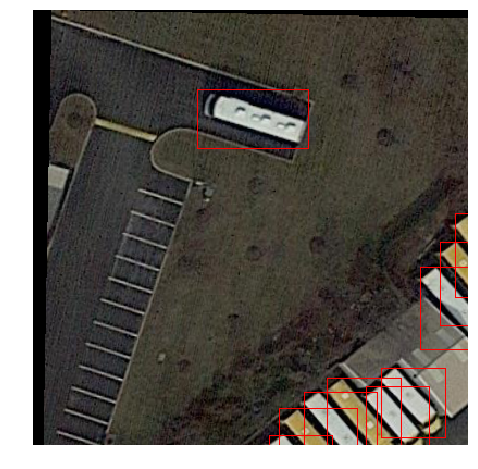

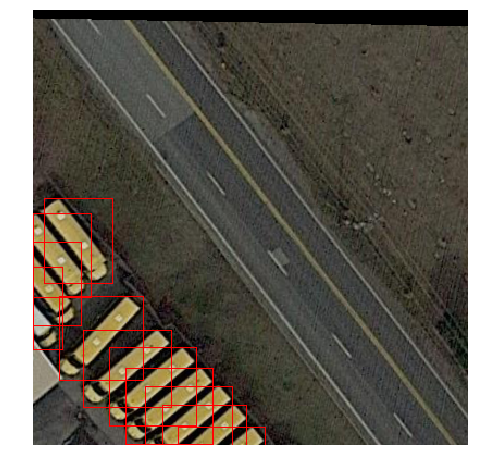

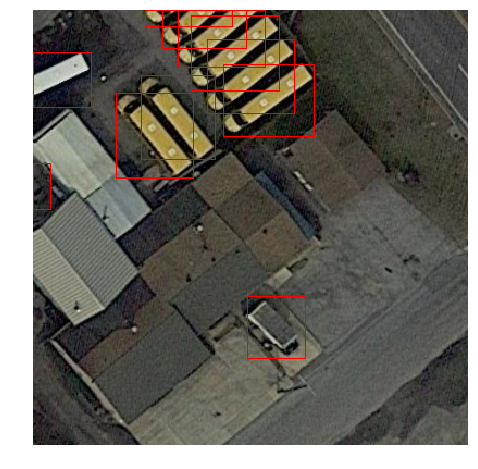

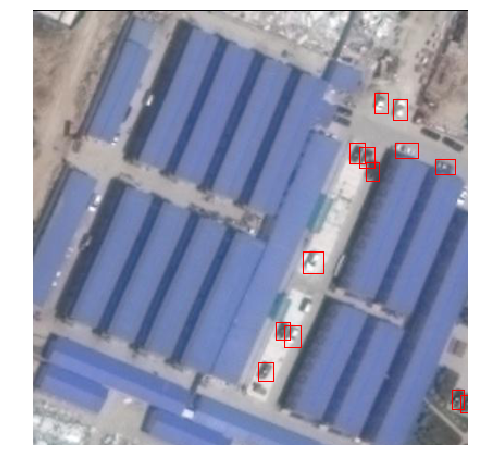

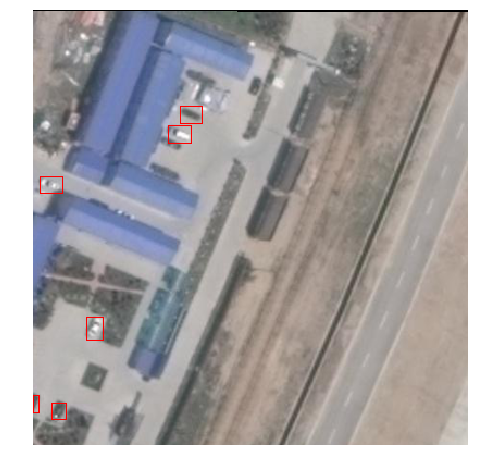

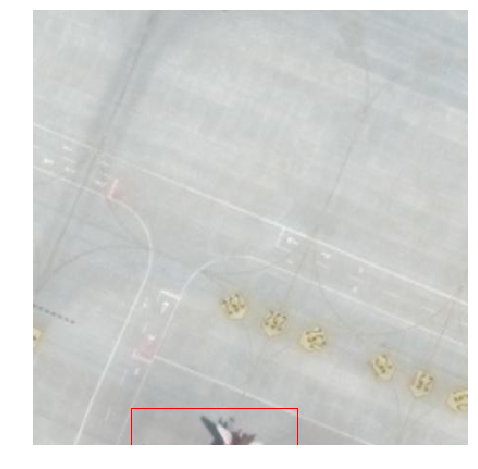

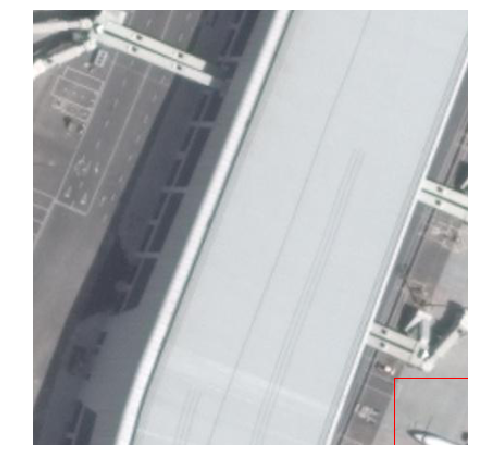

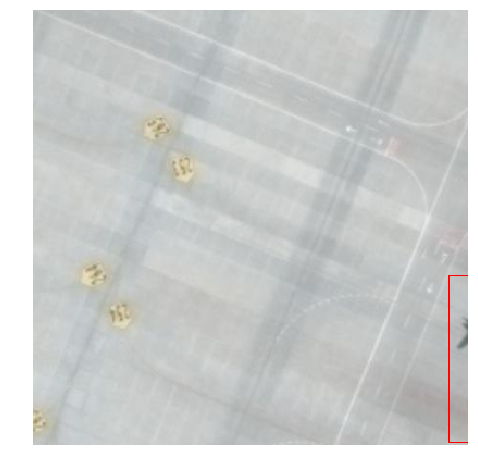

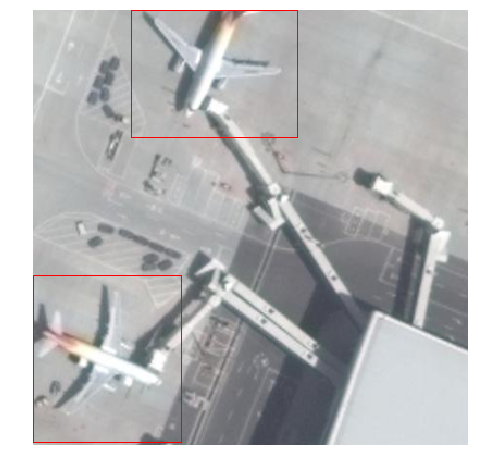

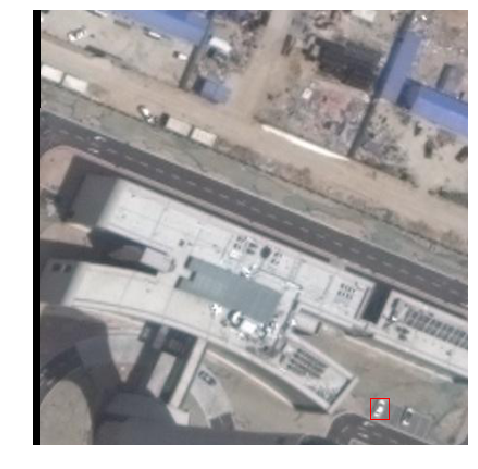

In [5]:
# Plotting PIL images as a matplotlib image screws up some of the bounding boxes for some reason;
# I assume it's a resize issue. Remove `return_image` or set it to `False` to pop-up a window with the image
for img in ds:
    plt.figure(figsize=(8,8))
    im = img.show(labels='all', return_image=True)
    plt.imshow(np.asarray(im))
    plt.axis('off')
    